In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/vicctoriia/flask-app/main/train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Pré-processamento
df.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True) #Features que não agregam para o modelo

In [4]:
df.isnull().sum() #vendo se há 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.drop(['Cabin'], axis = 1, inplace = True) #Muitos dados faltantes, pouca relevância, vale a pena retirar

In [6]:
med_age = df['Age'].mean() 
moda_emb = df['Embarked'].mode()[0]

In [7]:
df['Age'] = df['Age'].fillna(med_age) #completando os dados com a média - podia completar as mulheres com média de idade delas e homens tbm. 
df['Embarked'] = df['Embarked'].fillna(moda_emb) #variável categórica = completou com a moda

In [8]:
df.isnull().sum() #Agora não há mais nenhum dado faltante! 

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
#Categorização de variáveis contínuas

In [10]:
df['Age'].plot(kind = 'hist')

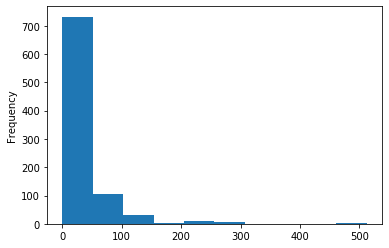

In [11]:
df['Fare'].plot(kind = 'hist')

In [12]:
#Remoção de Outliers

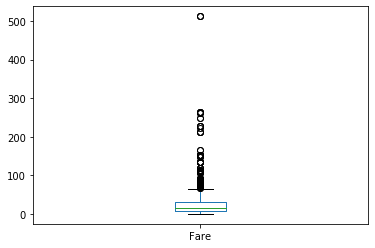

In [13]:
df['Fare'].plot(kind = 'box')

In [14]:
top = df['Fare'].quantile(0.975)
top

153.4625

In [15]:
#todos valores acima de 153 vão ser considerados outliers
df.loc[df['Fare'] > top, 'Fare'] = top

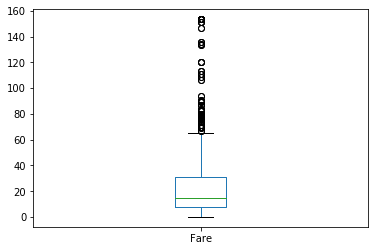

In [16]:
df['Fare'].plot(kind = 'box')

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
#Normalização
df['Age'] = df['Age']/100
df['Fare'] = df['Fare']/max(df['Fare'])

In [19]:
df['Name'][1].split(', ')[1].split('.')[0]

'Mrs'

In [20]:
# engenharia de features
def aux(x):
    return x.split(', ')[1].split('. ')[0]

df['Titulo'] = df['Name'].apply(aux)

df.drop(['Name'], axis = 1, inplace = True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulo
0,0,3,male,0.22,1,0,0.047243,S,Mr
1,1,1,female,0.38,1,0,0.464500,C,Mrs
2,1,3,female,0.26,0,0,0.051641,S,Miss
3,1,1,female,0.35,1,0,0.346013,S,Mrs
4,0,3,male,0.35,0,0,0.052456,S,Mr


In [21]:

df['Familia'] = df['SibSp'] + df['Parch'] + 1 #(mais eu)

def categorizar(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

df['FamiliaTipo'] = df['Familia'].apply(categorizar) 

df.drop(['Familia', 'Parch', 'SibSp'], axis = 1, inplace = True)

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Titulo,FamiliaTipo
0,0,3,male,0.22,0.047243,S,Mr,Pequena
1,1,1,female,0.38,0.464500,C,Mrs,Pequena
2,1,3,female,0.26,0.051641,S,Miss,Sozinho
3,1,1,female,0.35,0.346013,S,Mrs,Pequena
4,0,3,male,0.35,0.052456,S,Mr,Sozinho


In [22]:
#agrupamento de variáveis
def agrupar(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Outros'

df['Titulo'] = df['Titulo'].apply(agrupar)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Titulo,FamiliaTipo
0,0,3,male,0.22,0.047243,S,Mr,Pequena
1,1,1,female,0.38,0.464500,C,Mrs,Pequena
2,1,3,female,0.26,0.051641,S,Miss,Sozinho
3,1,1,female,0.35,0.346013,S,Mrs,Pequena
4,0,3,male,0.35,0.052456,S,Mr,Sozinho


In [23]:
#Transformando variáveis em dummies 

variaveis_cat = ['Pclass', 'Sex', 'Embarked', 'Titulo', 'FamiliaTipo']

df = pd.get_dummies(df, columns = variaveis_cat, drop_first = True)

df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0,0.22,0.047243,0,1,1,0,1,0,1,0,0,1,0
1,1,0.38,0.464500,0,0,0,0,0,0,0,1,0,1,0
2,1,0.26,0.051641,0,1,0,0,1,1,0,0,0,0,1
3,1,0.35,0.346013,0,0,0,0,1,0,0,1,0,1,0
4,0,0.35,0.052456,0,1,1,0,1,0,1,0,0,0,1


In [24]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Titulo_Miss', 'Titulo_Mr', 'Titulo_Mrs',
       'Titulo_Outros', 'FamiliaTipo_Pequena', 'FamiliaTipo_Sozinho'],
      dtype='object')

In [25]:
#Machine Learning
X = df.drop('Survived', axis = 1)
y = df['Survived']


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
model.score(X, y)

C:\Users\victoria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8305274971941639

In [27]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [28]:
#testando API
# url local
import json
import requests

url = 'http://127.0.0.1:5000' # change to your url

In [29]:
# sample data

data = {'Age': 0.22
        , 'Fare': 0.047243
        , 'Pclass_2': 0
        , 'Pclass_3': 1
        , 'Sex_male': 1
        , 'Embarked_Q':0
        , 'Embarked_S': 1
        , 'Titulo_Miss': 1
        , 'Titulo_Mr': 0
        , 'Titulo_Mrs': 0
        , 'Titulo_Outros': 0
        , 'FamiliaTipo_Pequena': 0
        , 'FamiliaTipo_Sozinho': 1
       }
#print(data)
data = json.dumps(data)
response = requests.post(url, data)
print(response.json())

{'results': {'results': 0}}
